This example uses only one feature of the diabetes dataset, in order to illustrate a two-dimensional plot of this regression technique. The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual summ of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

The coefficients, the residual sum of squares and the variance score are also calculated.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math

In [3]:
# load the datasets
df = pd.read_csv("diabetess.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
len(df)

768

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


code to generate heatmap to visualize the correlation matrix of dataset.

Correlation -1 (strong negative)
Correlation +1 (stromg positive)
Values close to 0 indicates no correlation.

Heatmap is a two-dimensional graphical representation of data where individuals values are represented by colors.

Light shades : white/yellow :: +1
Darker shades : blue/black :: -1
Neutral shades : near 0

<Axes: >

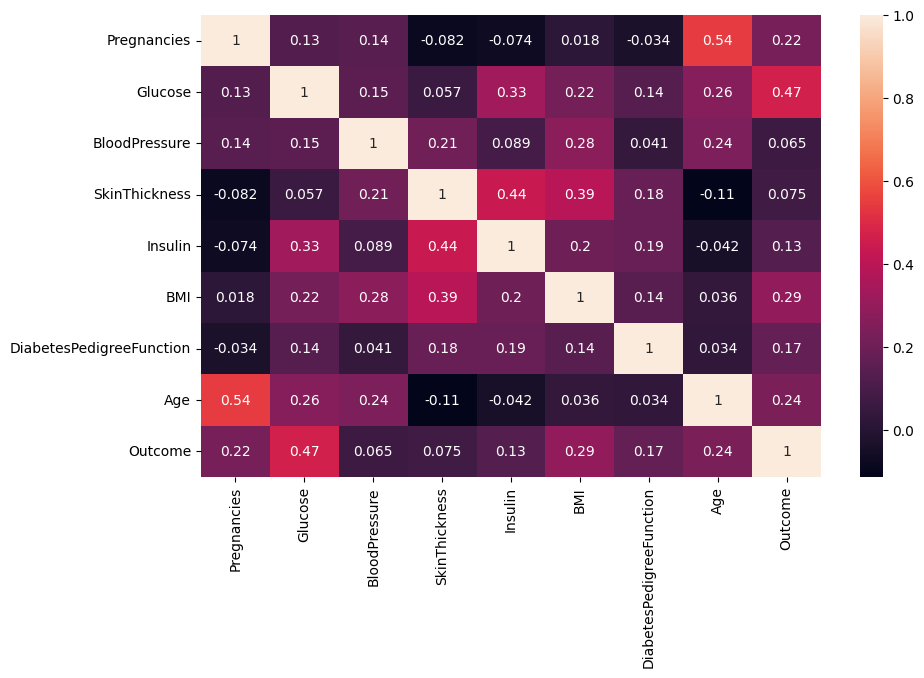

In [7]:
import seaborn as sns
plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

In [8]:
# check for missing values in DataFrame and summarize them by column
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
# check missing values by row-wise
df.isna().sum(axis=1)

,0
0,0
1,0
2,0
3,0
4,0
...,...
763,0
764,0
765,0
766,0


In [13]:
# use only one feature
diabetes_X = df[["BMI"]]
diabetes_y = df[["Outcome"]]

# print(diabetes_X)

      BMI
0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
..    ...
763  32.9
764  36.8
765  26.2
766  30.1
767  30.4

[768 rows x 1 columns]


In [6]:
# X = df['BMI'].values[:, np.newaxis]

In [16]:
# splits data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=42)

In [17]:
# verifying the split
print("X_train shape:", X_train.shape)
print("Y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (614, 1)
Y_train shape: (614, 1)
X_test shape: (154, 1)
Y_test shape: (154, 1)


In [18]:
# create a linear regression model
model = LinearRegression()

In [19]:
# train the model using the training sets
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
type(y_test)

pandas.core.frame.DataFrame

In [22]:
print("X_test - test X")
print(X_test[0:3])
print("y_test - actual")
print(y_test[0:3])
print("y_pred - model")
print(y_pred[0:3])

X_test - test X
      BMI
668  34.0
324  35.7
624  30.8
y_test - actual
     Outcome
668        0
324        0
624        0
y_pred - model
[[0.38492369]
 [0.41697292]
 [0.32459574]]


In [23]:
# print coefficient and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [[0.01885249]]
Intercept: [-0.25606083]


In [27]:
BMI = 25
print(f"Your predicted sugar level is {model.predict([[BMI]])}")

Your predicted sugar level is [[0.21525132]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
# calculate the residual sum of squares (mean squared error)
mse = mean_squared_error(y_test, y_pred)
print(f"Residual sum of squares (MSE): {mse:.2f}")

Residual sum of squares (MSE): 0.22


In [30]:
# calculate root mean squared error (RMSE)
rmse = math.sqrt(mse)
print(f"Root mean squared error (RMSE): {rmse:.2f}")

Root mean squared error (RMSE): 0.47


In [31]:
# calculate the variance score (R^2)
r2 = r2_score(y_test, y_pred)
print(f"Variance score (R^2): {r2}")


Variance score (R^2): 0.05134032021109902


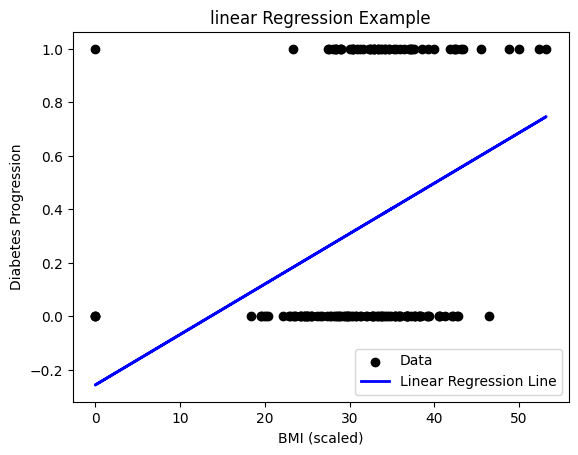

In [44]:
# plot the data

plt.scatter(X_test, y_test, color="black", label="Data")
plt.plot(X_test, y_pred, color="blue", linewidth=2, label="Linear Regression Line")
plt.xlabel("BMI (scaled)")
plt.ylabel("Diabetes Progression")
plt.title("linear Regression Example")
plt.legend()
plt.show()
